In [16]:
%pip install --quiet --upgrade numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification


In [ ]:
dado = np.loadtxt('apples_ts.csv', delimiter=',', usecols=np.arange(1,88,1))


A linha de código apresentada utiliza a função `np.loadtxt` da biblioteca NumPy para carregar dados de um arquivo CSV chamado 'apples_ts.csv'. O parâmetro `delimiter=','` indica que os valores no arquivo estão separados por vírgulas, o que é padrão em arquivos CSV. O argumento `usecols=np.arange(1,88,1)` especifica que apenas as colunas de índice 1 até 87 (lembrando que o índice inicial é incluso e o final é exclusivo) serão carregadas, ignorando a primeira coluna (índice 0). O resultado é armazenado na variável `dado`, que será um array NumPy contendo apenas os dados dessas colunas selecionadas.

Esse tipo de abordagem é muito útil quando o arquivo possui colunas que não são relevantes para a análise, permitindo carregar apenas o necessário e economizar memória. Além disso, o uso de np.arange para gerar a sequência de índices torna o código mais limpo e flexível, especialmente se o número de colunas for grande ou variar. Vale ressaltar que, caso o arquivo contenha cabeçalhos ou linhas de comentários, pode ser necessário utilizar o parâmetro skiprows para ignorá-los.

In [ ]:
# Exibindo as propriedades do array 'dado'
display(dado.ndim)   # número de dimensões
display(dado.shape)  # formato (shape)
display(dado.size)   # quantidade total de elementos
display(dado.dtype)  # tipo dos dados


2

(6, 87)

522

dtype('float64')

In [11]:


dado_transposto = dado.T.copy()


# Faz a transposição de uma matriz ou array NumPy chamado dado. O atributo .T é uma forma rápida e eficiente de obter a matriz transposta, ou seja, 
# trocar as linhas pelas colunas.

# Vale lembrar que, ao utilizar .T, não é criada uma nova cópia dos dados na memória, mas sim uma visão (view) transposta do array original, 
# tornando a operação eficiente em termos de desempenho e uso de memória. Se for necessário modificar os dados transpostos sem afetar o array original, 
# recomenda-se criar uma cópia explícita usando dado.T.copy().

# Exibindo as propriedades do array 'dado_transposto'
display(dado_transposto.ndim)   # número de dimensões
display(dado_transposto.shape)  # formato (shape)
display(dado_transposto.size)   # quantidade total de elementos
display(dado_transposto.dtype)  # tipo dos dados


2

(87, 6)

522

dtype('float64')

In [12]:
display(dado_transposto)

array([[  1.2013,  79.72  ,  42.67  ,  62.55  ,  48.26  ,  71.25  ],
       [  2.2013,  81.08  ,  44.37  ,  62.73  ,  51.01  ,  71.35  ],
       [  3.2013,  79.68  ,  44.73  ,  63.43  ,  50.91  ,  70.9   ],
       [  4.2013,  79.8   ,  46.75  ,  63.83  ,  53.94  ,  71.92  ],
       [  5.2013,  80.63  ,      nan,  66.06  ,  61.27  ,  72.91  ],
       [  6.2013,  80.8   ,  51.59  ,  69.22  ,  65.44  ,  74.39  ],
       [  7.2013,  80.28  ,  57.8   ,  72.07  ,  56.51  ,  73.1   ],
       [  8.2013,  78.99  ,  62.14  ,  69.31  ,  53.    ,  70.24  ],
       [  9.2013,  76.77  ,  56.76  ,  65.18  ,  43.87  ,  69.12  ],
       [ 10.2013,  76.09  ,  50.85  ,  62.13  ,  42.12  ,  68.98  ],
       [ 11.2013,  76.36  ,  46.43  ,  64.17  ,  43.98  ,  68.58  ],
       [ 12.2013,  77.16  ,  46.73  ,  65.5   ,  44.66  ,  69.5   ],
       [  1.2014,  77.5   ,  45.85  ,  66.85  ,  47.73  ,  70.14  ],
       [  2.2014,  79.03  ,  49.25  ,  68.38  ,  52.31  ,  70.58  ],
       [  3.2014,  80.28  ,  48.14

In [ ]:
#está utilizando indexação do NumPy para extrair todos os elementos da primeira coluna do array chamado dado_transposto. 
# O operador : seleciona todas as linhas, enquanto o índice 0 após a vírgula indica que queremos apenas a primeira coluna. 
# Assim, datas será um array contendo todos os valores da primeira coluna de dado_transposto.
datas = dado_transposto[:,0]
display(datas)

array([ 1.2013,  2.2013,  3.2013,  4.2013,  5.2013,  6.2013,  7.2013,
        8.2013,  9.2013, 10.2013, 11.2013, 12.2013,  1.2014,  2.2014,
        3.2014,  4.2014,  5.2014,  6.2014,  7.2014,  8.2014,  9.2014,
       10.2014, 11.2014, 12.2014,  1.2015,  2.2015,  3.2015,  4.2015,
        5.2015,  6.2015,  7.2015,  8.2015,  9.2015, 10.2015, 11.2015,
       12.2015,  1.2016,  2.2016,  3.2016,  4.2016,  5.2016,  6.2016,
        7.2016,  8.2016,  9.2016, 10.2016, 11.2016, 12.2016,  1.2017,
        2.2017,  3.2017,  4.2017,  5.2017,  6.2017,  7.2017,  8.2017,
        9.2017, 10.2017, 11.2017, 12.2017,  1.2018,  2.2018,  3.2018,
        4.2018,  5.2018,  6.2018,  7.2018,  8.2018,  9.2018, 10.2018,
       11.2018, 12.2018,  1.2019,  2.2019,  3.2019,  4.2019,  5.2019,
        6.2019,  7.2019,  8.2019,  9.2019, 10.2019, 11.2019, 12.2019,
        1.202 ,  2.202 ,  3.202 ])

In [14]:
precos = dado_transposto[:,1:6]
display(precos)

array([[ 79.72,  42.67,  62.55,  48.26,  71.25],
       [ 81.08,  44.37,  62.73,  51.01,  71.35],
       [ 79.68,  44.73,  63.43,  50.91,  70.9 ],
       [ 79.8 ,  46.75,  63.83,  53.94,  71.92],
       [ 80.63,    nan,  66.06,  61.27,  72.91],
       [ 80.8 ,  51.59,  69.22,  65.44,  74.39],
       [ 80.28,  57.8 ,  72.07,  56.51,  73.1 ],
       [ 78.99,  62.14,  69.31,  53.  ,  70.24],
       [ 76.77,  56.76,  65.18,  43.87,  69.12],
       [ 76.09,  50.85,  62.13,  42.12,  68.98],
       [ 76.36,  46.43,  64.17,  43.98,  68.58],
       [ 77.16,  46.73,  65.5 ,  44.66,  69.5 ],
       [ 77.5 ,  45.85,  66.85,  47.73,  70.14],
       [ 79.03,  49.25,  68.38,  52.31,  70.58],
       [ 80.28,  48.14,  68.77,  56.8 ,  70.78],
       [ 80.05,  49.18,  69.32,  51.15,  72.78],
       [ 78.11,  49.49,  69.77,  54.63,  72.84],
       [ 76.9 ,  49.83,  70.17,  55.8 ,  74.74],
       [ 77.68,  49.14,  70.76,  57.31,  76.43],
       [ 76.05,  63.21,  75.16,  53.81,  81.2 ],
       [ 75.53,  61.

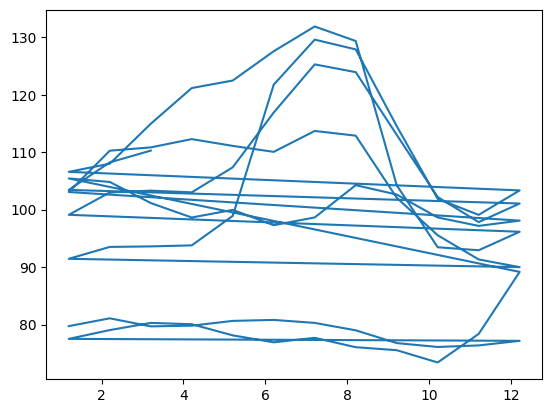

In [17]:
plt.plot(datas, precos[:,0])

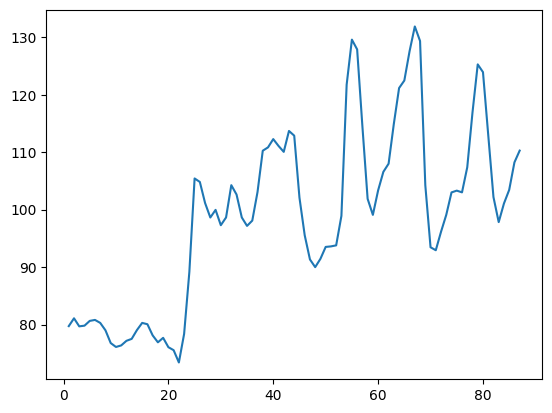

In [19]:
datas = np.arange(1, 88,1)
plt.plot(datas, precos[:,0])

In [20]:
Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]